In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock/NFLX_2.csv')

In [4]:
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700


In [5]:
# Get the number of trading days
df.shape

(3119, 7)

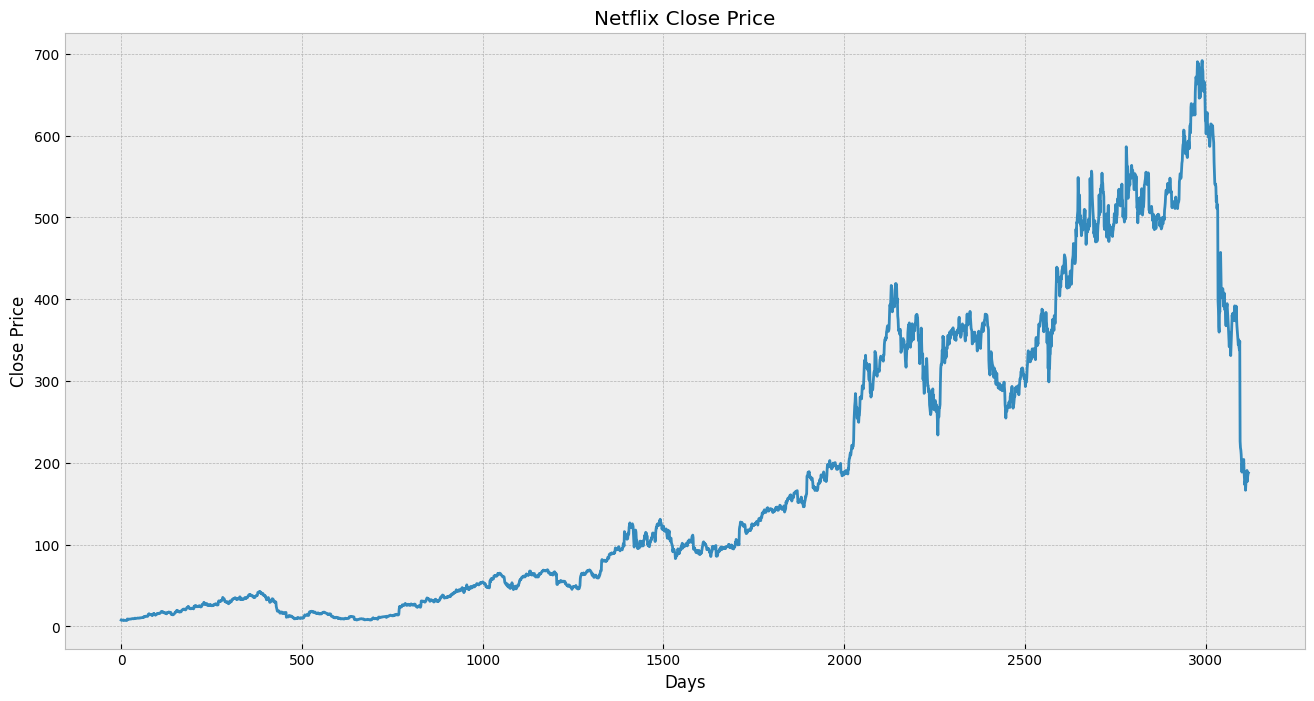

In [6]:
# visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [7]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,7.640000
1,7.358571
2,7.617143
3,7.485714
4,7.614286


In [8]:
# Create a var to predict 'x' days out into the future
future_days = 25

# New column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)
# df.tail(4)

,Close,Prediction
0,7.640000,8.875714
1,7.358571,8.784286
2,7.617143,9.051429
3,7.485714,9.025714


In [9]:
# Create the future data set (X)
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[  7.64    ]
 [  7.358571]
 [  7.617143]
 ...
 [350.429993]
 [341.130005]
 [337.859985]]


In [10]:
y = np.array(df['Prediction'])[:-future_days]
y

array([  8.875714,   8.784286,   9.051429, ..., 183.479996, 186.350006,
       187.440002])

In [11]:
# Split 75-25 for train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# Create the models
# DT regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [13]:
# Get the last x rows from future_dataset
X_future = df.drop(['Prediction'], axis=1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[331.01001 ],
       [343.75    ],
       [357.529999],
       [371.399994],
       [380.600006],
       [374.589996],
       [382.920013],
       [374.48999 ],
       [375.709991],
       [373.850006],
       [378.51001 ],
       [391.820007],
       [381.470001],
       [374.589996],
       [373.470001],
       [391.5     ],
       [380.149994],
       [368.350006],
       [362.149994],
       [355.880005],
       [348.      ],
       [344.100006],
       [350.429993],
       [341.130005],
       [337.859985]])

In [14]:
# Show the model tree prediction
tree_predict = tree.predict(X_future)
print(tree_predict)
print()

# Show the model LR
lr_predict = lr.predict(X_future)
print(lr_predict)

[348.609985  226.190002  218.220001  215.520004  317.380005  189.6849975
 188.539993  189.6849975 434.26001   199.460007  199.869995  204.009995
 188.320007  189.6849975 173.100006  177.660004  166.369995  174.309998
 187.639999  186.509995  190.559998  177.190002  183.479996  186.350006
 187.440002 ]

[329.10026605 341.54873981 355.0134251  368.5660471  377.55554457
 371.68305552 379.82246521 371.58533786 372.77742282 370.95999796
 375.51337183 388.51880969 378.40563236 371.68305552 370.58868823
 388.20612509 377.11582974 365.58584887 359.52770545 353.40118623
 345.70149138 341.89073698 348.07588132 338.98869549 335.79350004]


<ipython-input-15-5af93afd1cfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


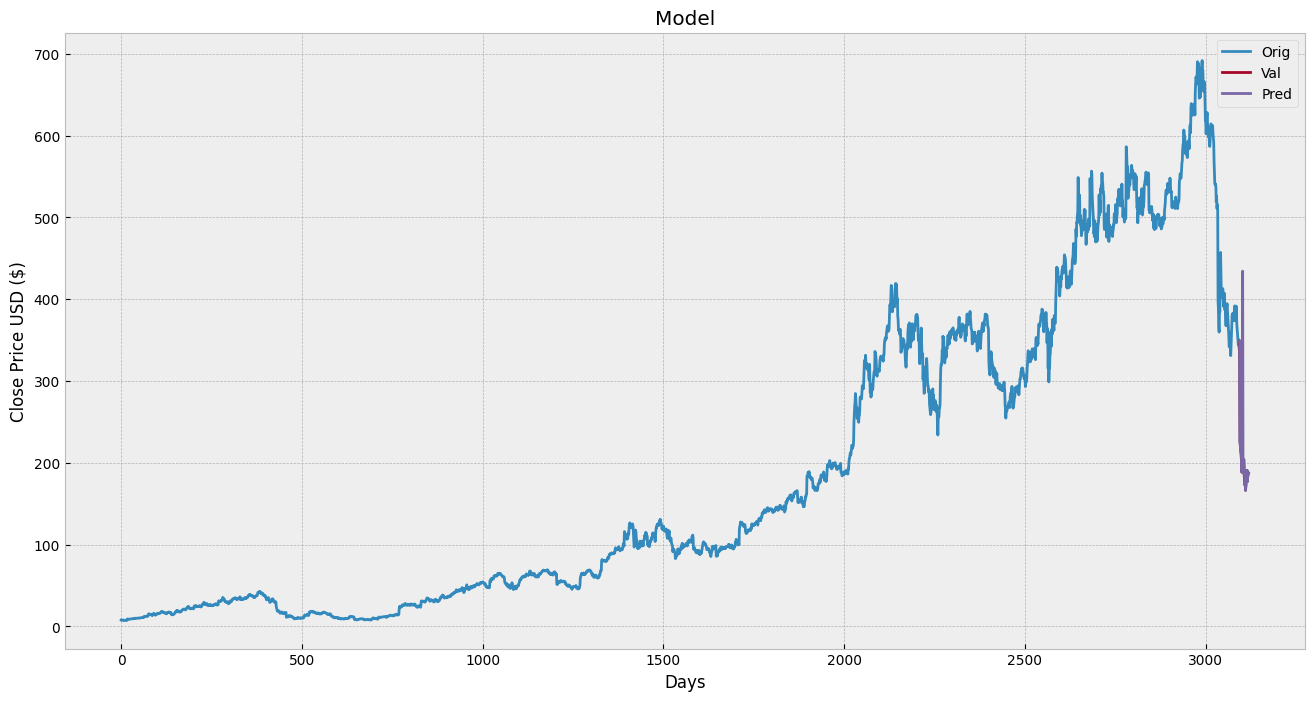

In [15]:
# Visualize the data
predictions = tree.predict(X_future) # Call the predict method with X_future to get predicted values

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

<ipython-input-16-2c8e3d97063e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


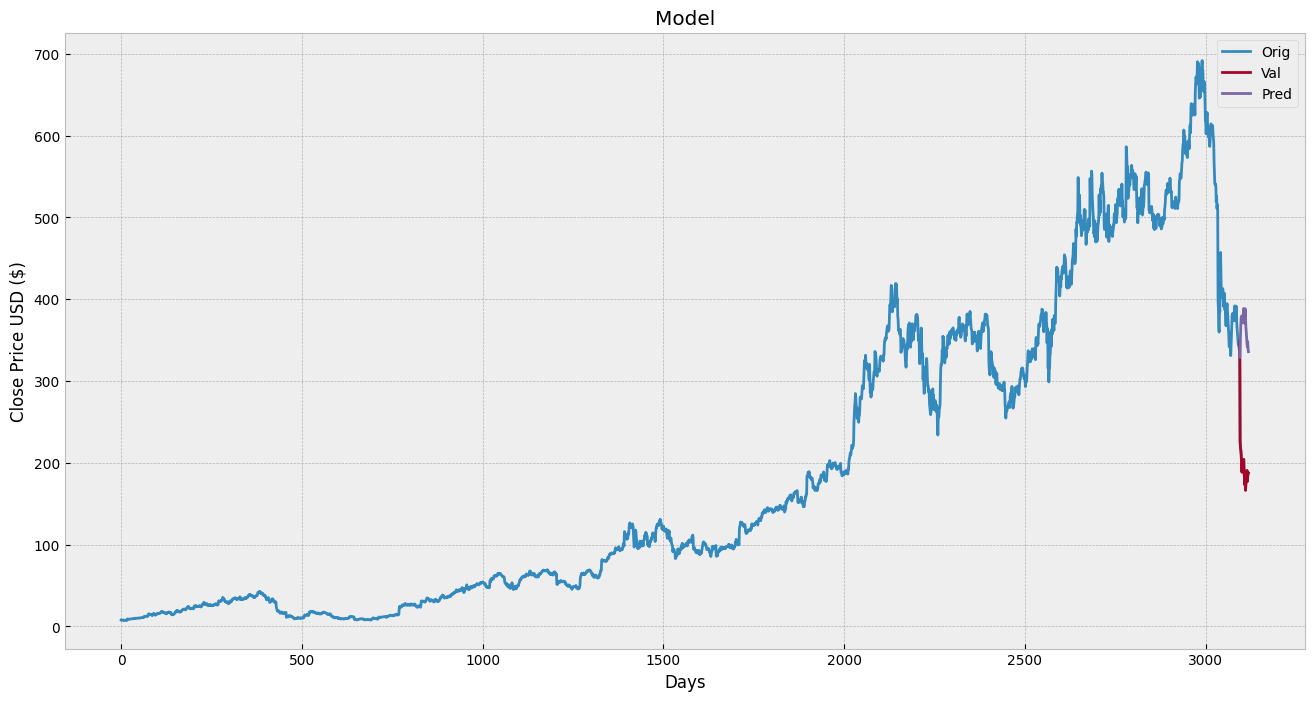

In [16]:
# Visualize the data
predictions = lr_predict

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])